In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **데이터 로드 및 탐색**

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/1-0. 서강대/1. 빅데이터 예측 분석 팀플 (6팀)/기말 팀 프로젝트/코드/dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/1-0. 서강대/1. 빅데이터 예측 분석 팀플 (6팀)/기말 팀 프로젝트/코드/dataset2.csv")

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

# **정규화**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df)

df_minmax = pd.DataFrame(df_minmax, columns = df.columns)
df_minmax.head()

,연체 여부,최근 3개월 연체 등록 건수,최근 6개월 연체 등록 건수,대출 금액(대부업권),카드 개설 건수,대출 금액
0,0.0,0.0,0.0,0.0,0.181818,0.172893
1,0.0,0.0,0.0,0.0,0.454545,0.000000
2,0.0,0.0,0.0,0.0,0.090909,0.119237
3,0.0,0.0,0.0,0.0,0.090909,0.000000
4,0.0,0.0,0.0,0.0,0.363636,0.000000


In [ ]:
dfX = df_minmax.drop(['연체 여부'], axis=1)
dfy = pd.DataFrame(df_minmax, columns=["연체 여부"]) # 종속 변수로 DLQ 설정

# **train, test 분리 (8:2)**

In [ ]:
from sklearn.model_selection import train_test_split

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(dfX , dfy , test_size=0.2, shuffle=True)  # random_state=156
print(X_train.shape, X_test.shape)

(21444, 5) (5361, 5)


# **모델 학습 - KNN**
https://tobigs.gitbook.io/tobigs/data-analysis/python-knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNeighborsClassifier
KNN = KNeighborsClassifier()

# GridSearch
parameters = {'n_neighbors':list(range(1,11)), 'weights':['uniform', 'distance'], 
              'metric':['euclidean', 'manhattan', 'minkowski']}

grid_KNN = GridSearchCV(estimator=KNN, param_grid=parameters, cv=3, refit=True, scoring='f1')

# fit
grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
scores_df = pd.DataFrame(grid_KNN.cv_results_)
scores_df = scores_df[(scores_df['rank_test_score'] < 6)]
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
17,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.848812,5,0.857143,0.843478,0.845815
36,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.854350,2,0.846774,0.831169,0.885106
37,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.853202,4,0.865306,0.848485,0.845815
38,"{'metric': 'manhattan', 'n_neighbors': 10, 'we...",0.853362,3,0.853659,0.826087,0.880342
39,"{'metric': 'manhattan', 'n_neighbors': 10, 'we...",0.856544,1,0.865306,0.853448,0.850877
57,"{'metric': 'minkowski', 'n_neighbors': 9, 'wei...",0.848812,5,0.857143,0.843478,0.845815


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_KNN.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_KNN.best_score_))

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_KNN.best_estimator_

from sklearn.metrics import *
from sklearn.metrics import accuracy_score
# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))
print('테스트 데이터 세트 Recall: {0:.4f}'.format(recall_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
GridSearchCV 최고 정확도: 0.8565
테스트 데이터 세트 정확도: 0.9946
테스트 데이터 세트 Recall: 0.8095


## **예측**

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=10, weights='distance', metric="manhattan")
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [ ]:
# predict 메소드 : 학습된 모델로 예측을 수행
y_preds_KNN = KNN.predict(X_test)
print("예측값 : ", y_preds_KNN[61:70])
print("실제값 : ", y_test[61:70])

예측값 :  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
실제값 :         연체 여부
5050     0.0
9064     0.0
11417    0.0
2405     0.0
74       0.0
17767    0.0
20742    0.0
2833     0.0
23086    0.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import *
import numpy as np

print('accuracy: ', round(accuracy_score(y_test,y_preds_KNN.round()), 4))
print('precision: ', precision_score(y_test,y_preds_KNN.round()))
print('recall: ', recall_score(y_test,y_preds_KNN.round()))
print('f1_score: ', f1_score(y_test,y_preds_KNN.round()))
print(classification_report(y_test, y_preds_KNN))

accuracy:  0.9946
precision:  0.9042553191489362
recall:  0.8095238095238095
f1_score:  0.8542713567839195
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5256
         1.0       0.90      0.81      0.85       105

    accuracy                           0.99      5361
   macro avg       0.95      0.90      0.93      5361
weighted avg       0.99      0.99      0.99      5361



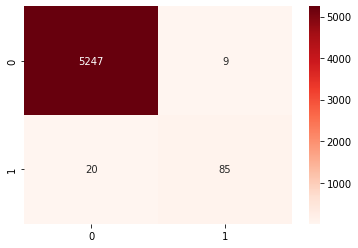

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_preds_KNN) 
sns.heatmap(cm, annot=True,  cmap='Reds', fmt='g') # fmt='g': e-notation을 일반표기법으로
plt.show()

roc_auc_score for KNN:  0.9039057403783431


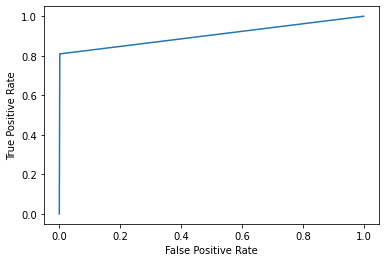

In [ ]:
#define metrics
fpr, tpr, _ = roc_curve(y_test, y_preds_KNN) # false_positive_rate, true_positive_rate, threshold
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_preds_KNN))

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()